In [2]:
library(ggplot2); library(GGally)

In [3]:
wholesale_data = read.csv('../data/clean_wholesale.csv')

## Data Exploration

## k-means clustering

In [4]:
set.seed(2); data_to_cluster <- subset(wholesale_data, select = -c(Region, Channel))

In [5]:
km2 <- kmeans(data_to_cluster, 2, nstart = 20); 
data_to_cluster['km2'] <- as.factor(km2$cluster)
km2

K-means clustering with 2 clusters of sizes 103, 327

Cluster means:
         X     Fresh     Milk  Grocery   Frozen Detergents_Paper     Deli
1 216.4272 27355.757 4120.000 5545.505 4911.893         1134.194 1969.359
2 224.8593  6369.358 5425.878 7665.893 2316.630         2956.058 1159.627

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   2   2   2   1   2   2   2   2   2   2   2   1   1   1   2   2   2   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   2   1   1   2   2   2   2   1   1   2   1   1   2   2   1   2   2   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   2   2   2   2   2   2   2   2   2   1   2   1   2   2   2   2   2   2   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   1   2   2   1   1   2   1   2   1   2   2   2   2   2   2   2   1 
 81  82  83  84  85  86  87  88  89  90  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


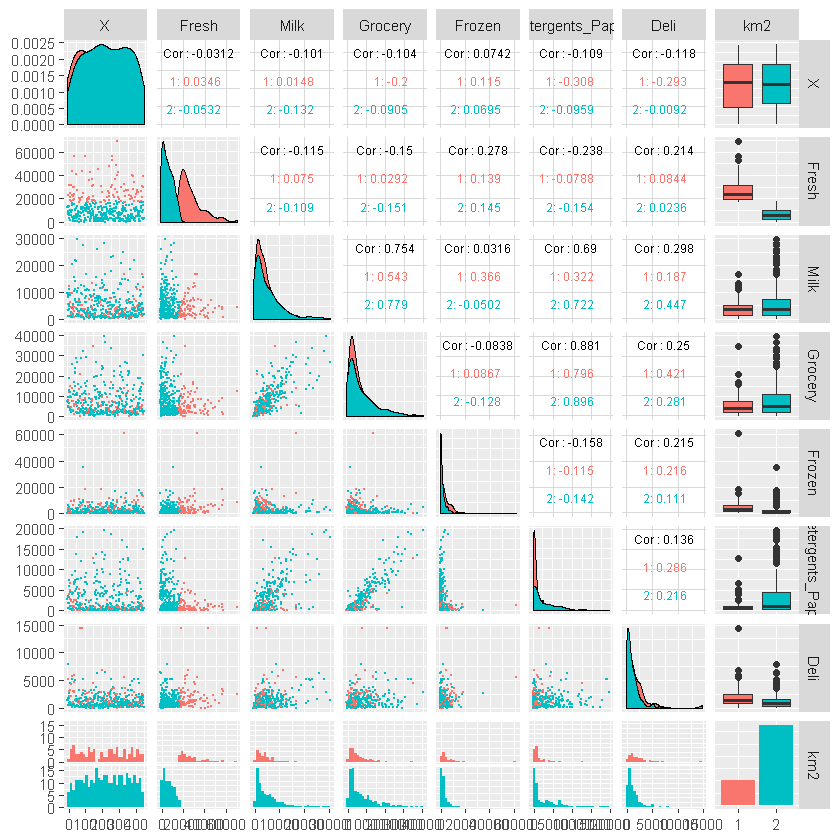

In [6]:
ggpairs(data = data_to_cluster,
        mapping = aes(color = km2),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


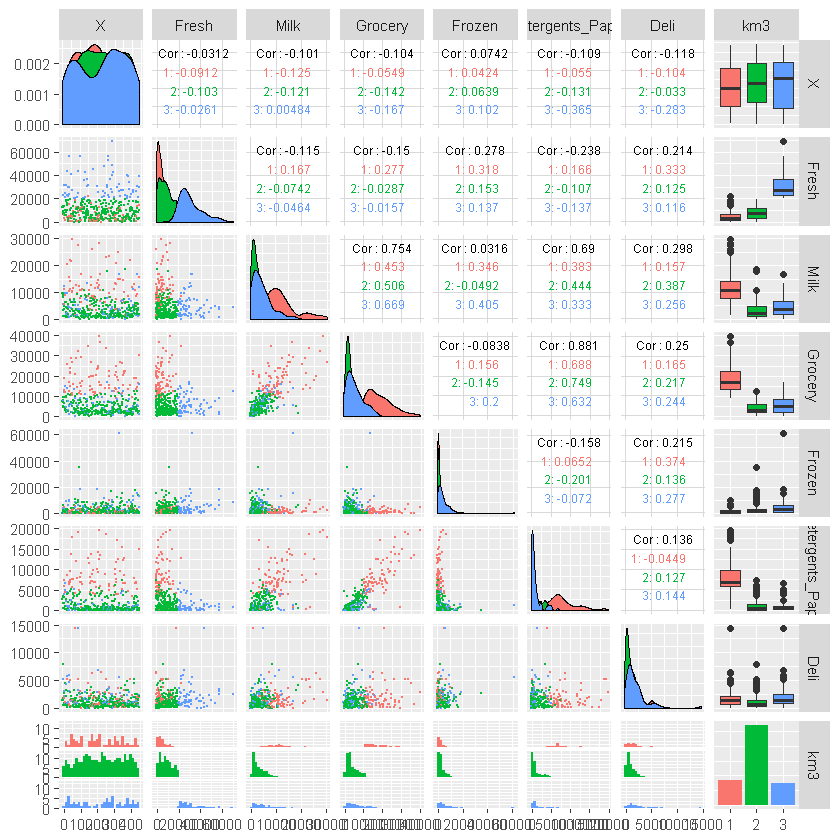

In [7]:
data_to_cluster <- subset(data_to_cluster, select = -c(km2))
km3 <- kmeans(data_to_cluster, 3, nstart = 20); 
data_to_cluster['km3'] <- as.factor(km3$cluster)
ggpairs(data = data_to_cluster,
        mapping = aes(color = km3),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


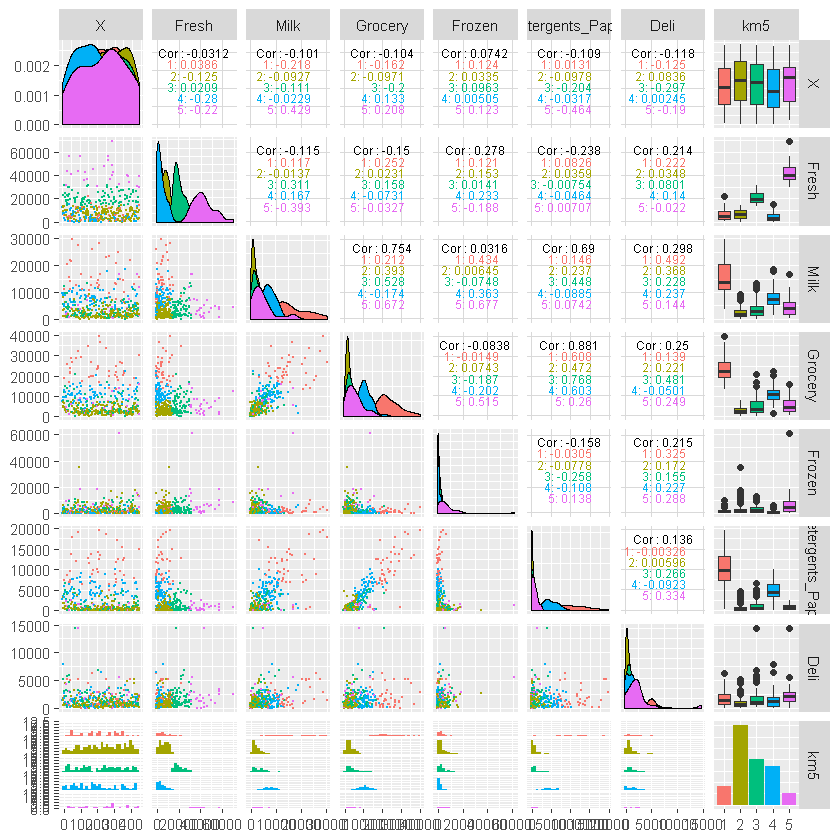

In [8]:
data_to_cluster <- subset(data_to_cluster, select = -c(km3))
km5 <- kmeans(data_to_cluster, 5, nstart = 20); 
data_to_cluster['km5'] <- as.factor(km5$cluster)
ggpairs(data = data_to_cluster,
        mapping = aes(color = km5),
        upper = list(continuous = wrap(ggally_cor, size = 2.5, alignPercent = 0.8)),
        lower = list(continuous = wrap(ggally_points, cex = .1))
        )

In [9]:
data_to_cluster <- subset(data_to_cluster, select = -c(km5))

### Sum of Squares

In [10]:
clus <- 2:5
WSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$tot.withinss
})

BSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$betweenss
})


TSS <- sapply(clus, function(k) {
  kmeans(data_to_cluster, centers = k)$totss
})


In [11]:
SS <- cbind(WSS, BSS, TSS); rownames(SS) <- clus

In [12]:
SS <- as.data.frame(SS)

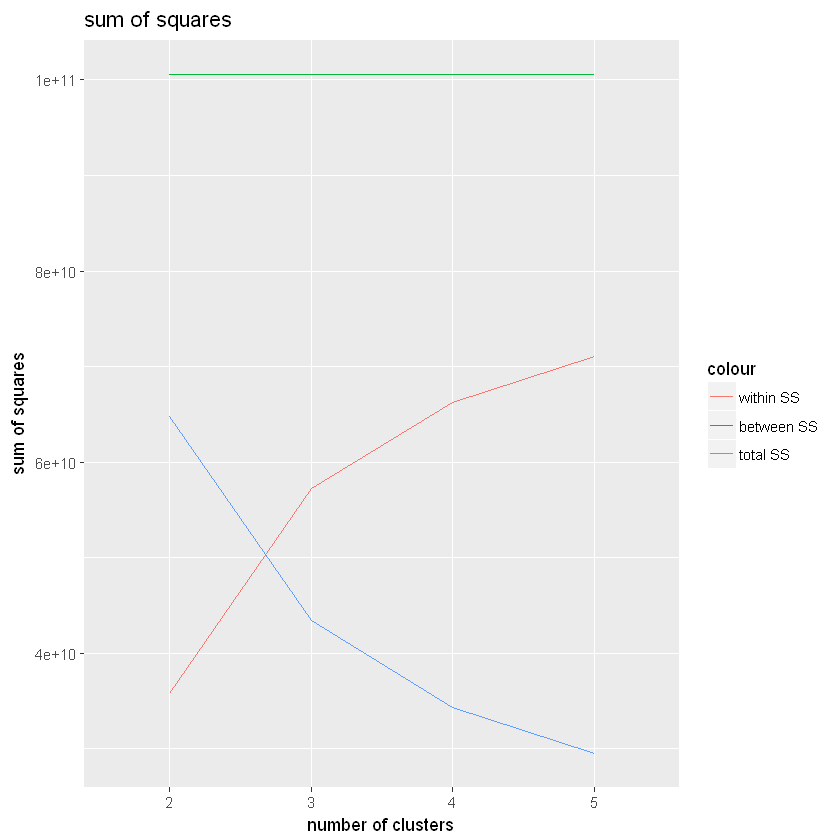

In [13]:
ggplot(data = SS, aes(x = rownames(SS), group = 1)) + 
    geom_line(aes(y = WSS, col = 'r')) +
    geom_line(aes(y = BSS, col = 'b')) +
    geom_line(aes(y = TSS, col = 'k')) +
    labs(title = 'sum of squares', x = 'number of clusters', y='sum of squares') +
    scale_color_discrete(labels = c('within SS', 'between SS', 'total SS'))

#### Herarchical Clustering

The `hclust()`fn implements hierarchical clustering in R. In the following eg, we plot the hierarchical clusterg dendrogram usg complete, single, and avg linkage clusterg, w/ Euclidean distance as the dissimilarity measure. We begin by clusterg obs usg complete linkage. The `dist()` fn is used to compute the inter-observatn Euclidean distance matrix. 
    
 Summary of Four Most Commonly-Used Types of Linkage in Hierarchical Clustering

| linkage | distance between clusters equals | notes |
|----------|----------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| complete | max(all pairwise dissimilarities btwn the observations in cluster A & observations in cluster B); maximal intercluster dissimilarity                     |  |
| single | min(" "); minimal intercluster dissimilarity |  |
| average | avg(" " ); mean intercluster dissimilarity |  |
| centroid | dissimilarity btwn the centroid for cluster A and the centroid for cluster B. | can result in undesirable *inversions*; inversions occur when two clusters are fused @ a height below either of the individual clusters in the dendogram. This can lead to difficulties in visualization as well as interpretatn of the dendogram.  |

In [14]:
hc.complete <- hclust(dist(data_to_cluster), method = 'complete')
hc.avg <- hclust(dist(data_to_cluster), method = 'average')
hc.single <- hclust(dist(data_to_cluster), method = 'single')

We can not plot the dendograms obtained using the usual `plot()` fn. The numbers at the bottom of the plot identify each observation.

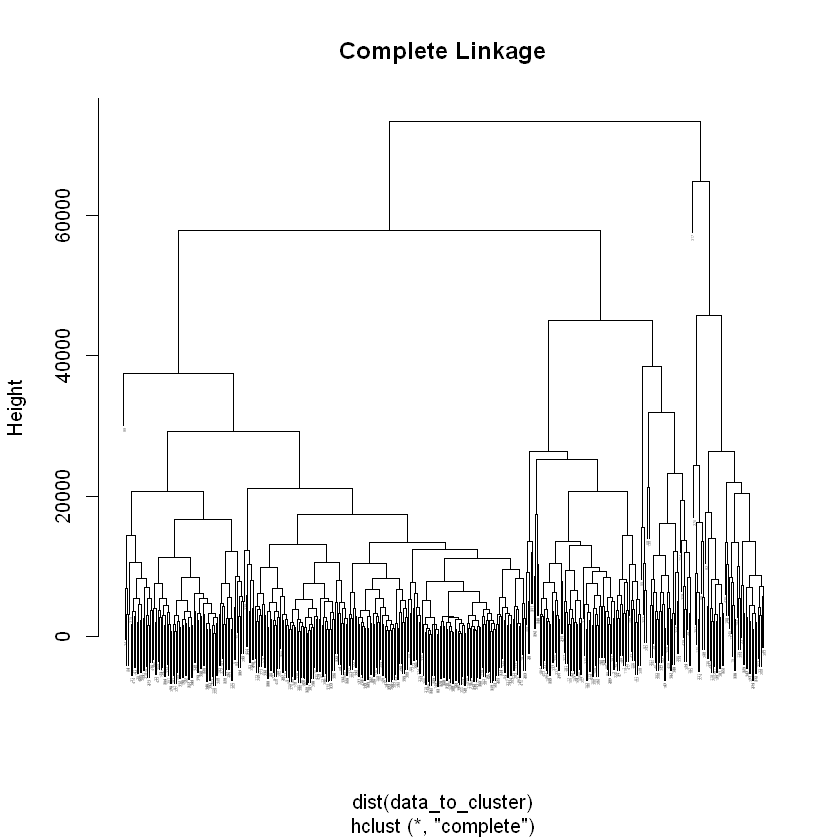

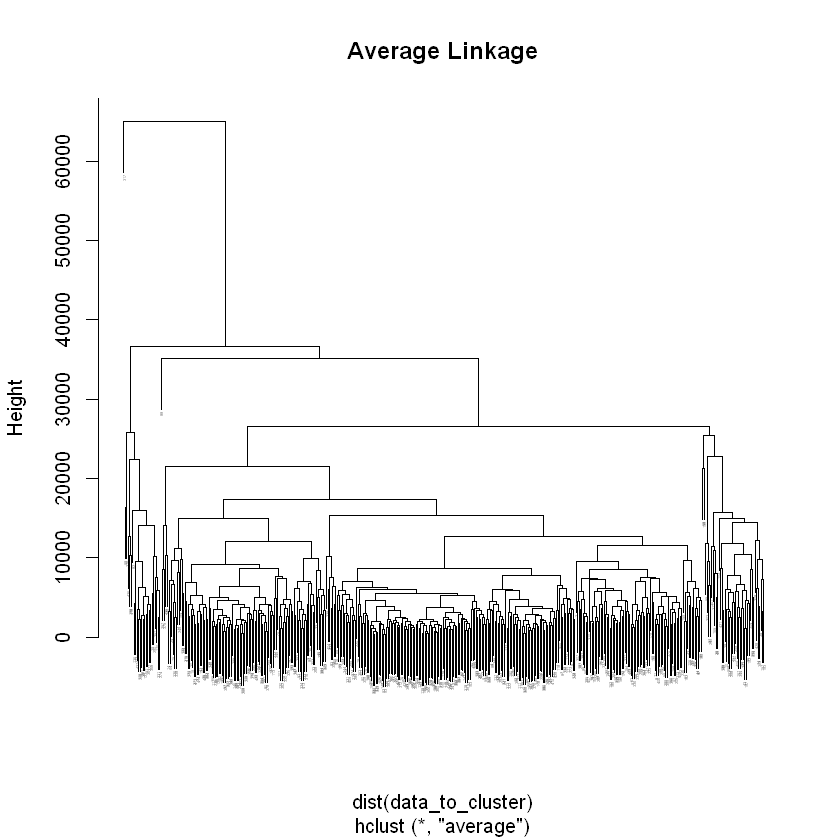

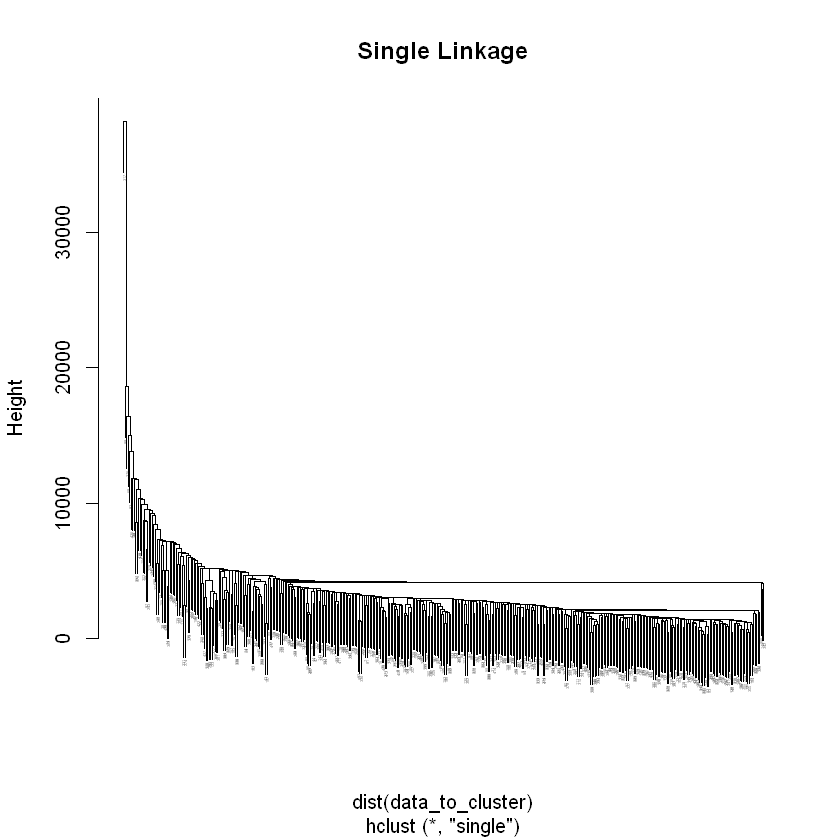

In [15]:
plot(hc.complete, main = 'Complete Linkage', cex = 0.2)
plot(hc.avg, main = 'Average Linkage', cex = 0.2)
plot(hc.single, main = 'Single Linkage', cex = 0.2)

To determine the cluster labels for each observation associated w/ a given cut of the dendogram, we can use the `cutree()` fn. We should check for singletons, that is groups/clusters with only one member.  Singletons aren't good.
`k` = number of groups

In [16]:
table(cutree(tree = hc.complete, k = 2))


  1   2 
381  49 

Cutting at level two on clustering using average-linkage or single-linkage gives us a singleton.

In [17]:
table(cutree(hc.avg, 2))


  1   2 
429   1 

In [18]:
table(cutree(hc.single, 2))


  1   2 
429   1 

#### Correlation-Based Dissimilarity 
The simplest way to measure dissimilarity is to use the Euclidean distance. Sometimes, correlation-based distance may be more appropriate and can be computed using as.dist() which converts an arbritrary square symmetric matrix into a form that the hclust() fn recognizes as a distance matrix.  

Two observations may be dissimilar in terms of Euclidean distance but similar in terms of correlation. This may be especially useful and noteworthy when performing customer segmentation. In customer segmentation, we may want to identify groups of similar shoppers with similar shopping histories that will respond to targeted ads. Using a correlation-based dissimilarity measure, we can group shoppers by types of items bought rather than how many items bought. The Euclidean-based dissimilarity measure will cluster shoppers who have bought very few items.

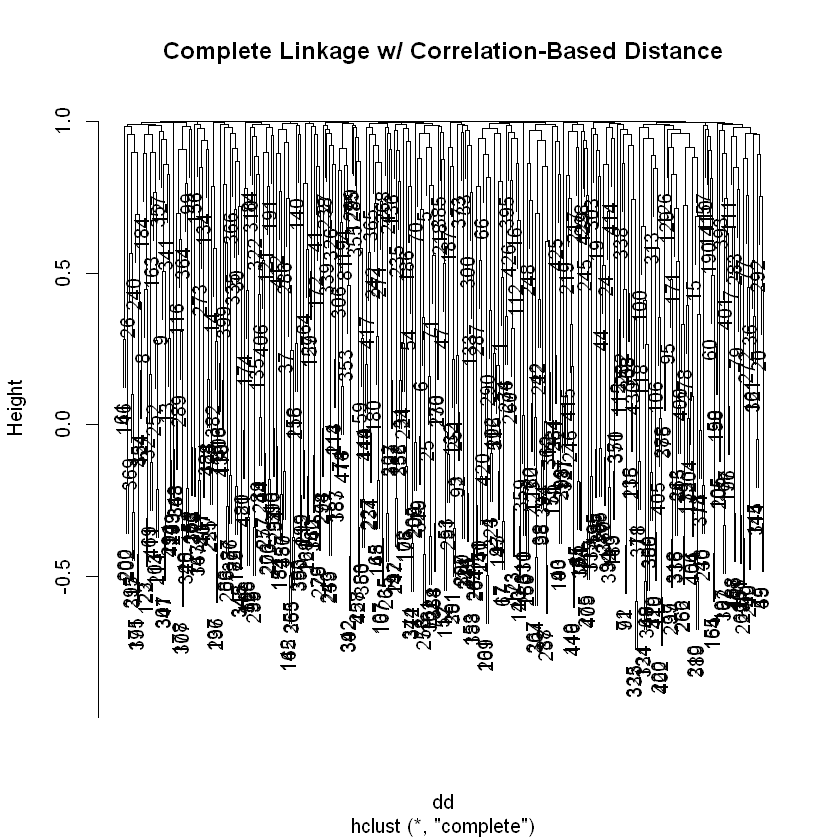

In [19]:
dd <- as.dist(cor(t(data_to_cluster)))
plot(hclust(dd, method = 'complete'), main = 'Complete Linkage w/ Correlation-Based Distance')

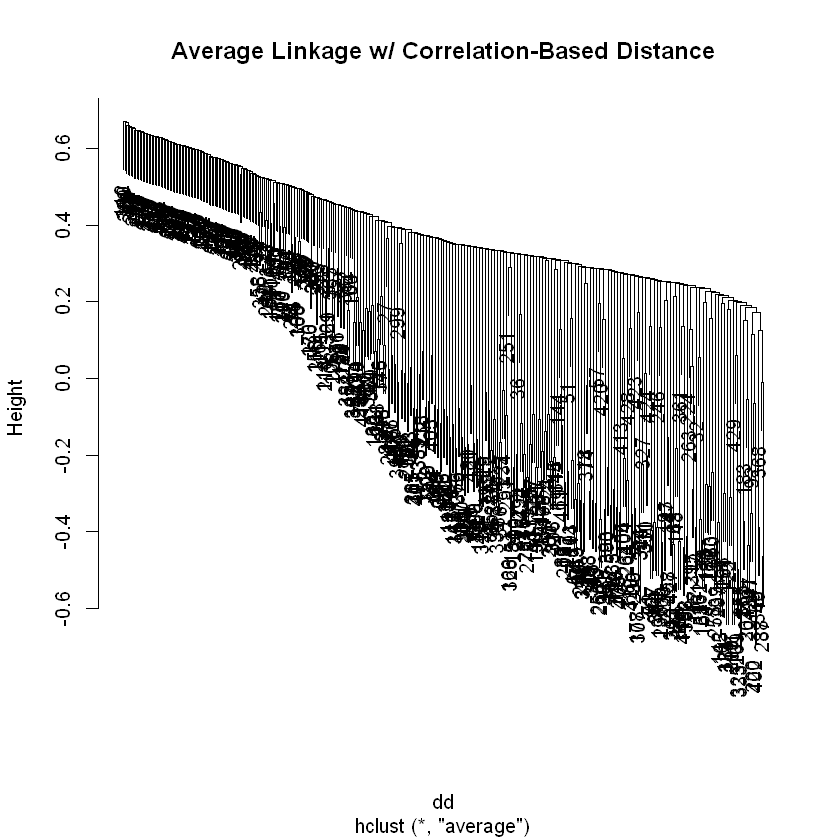

In [20]:
plot(hclust(dd, method = 'average'), main = 'Average Linkage w/ Correlation-Based Distance')

##### Why Not Scale Variables?
It can be a good idea to scale your variables before peforming hierarchical clusterg of the observations. It is not necessary in this case because each feature is using the same units, monetary units. 

# Conclusion
As we have seen, cluster modeling can provide insights into customers and their buying habits. It can inform us when building targeted marketing stratgies using the profiles of each cluster.